In [19]:
import pandas as pd
df = pd.read_csv('../assets/patient/patient_concat.csv', index_col=0)
df

,message,message_type
0,Hi,patient_greet
1,Hello,patient_greet
2,Hey there,patient_greet
3,Good morning,patient_greet
4,Good afternoon,patient_greet
...,...,...
450,"Unfortunately, I have a conflicting schedule.",patient_rejection
451,"Sorry, that time doesn't suit my availability.",patient_rejection
452,I need to cancel as I have another appointment.,patient_rejection
453,"Unfortunately, I won't be available at that time.",patient_rejection


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib

tfidf_vectorizer = TfidfVectorizer(lowercase=True)
X_full = df['message'].sort_index().values
y_full = df['message_type'].sort_index().values
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['message_type'], test_size=0.2, random_state=42)
message_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef
import joblib
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
svm = SVC()
svm.fit(message_tfidf, y_train)

# Predictions on training data
y_pred_train = svm.predict(message_tfidf)

# Evaluate performance on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)
kappa_train = cohen_kappa_score(y_train, y_pred_train)
mcc_train = matthews_corrcoef(y_train, y_pred_train)

print("Training Performance:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("Confusion Matrix:")
print(conf_matrix_train)
print("Classification Report:")
print(classification_rep_train)
print("Cohen's Kappa:", kappa_train)
print("Matthews Correlation Coefficient:", mcc_train)

# Transform testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predictions on testing data
y_pred_test = svm.predict(X_test_tfidf)

# Evaluate performance on testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)
kappa_test = cohen_kappa_score(y_test, y_pred_test)
mcc_test = matthews_corrcoef(y_test, y_pred_test)

print("\nTesting Performance:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(conf_matrix_test)
print("Classification Report:")
print(classification_rep_test)
print("Cohen's Kappa:", kappa_test)
print("Matthews Correlation Coefficient:", mcc_test)

Training Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 79   0   0   0]
 [  0  82   0   0]
 [  0   0 122   0]
 [  0   0   0  81]]
Classification Report:
                      precision    recall  f1-score   support

patient_confirmation       1.00      1.00      1.00        79
       patient_greet       1.00      1.00      1.00        82
       patient_issue       1.00      1.00      1.00       122
   patient_rejection       1.00      1.00      1.00        81

            accuracy                           1.00       364
           macro avg       1.00      1.00      1.00       364
        weighted avg       1.00      1.00      1.00       364

Cohen's Kappa: 1.0
Matthews Correlation Coefficient: 1.0

Testing Performance:
Accuracy: 0.967032967032967
Precision: 0.9706959706959707
Recall: 0.967032967032967
F1 Score: 0.967032967032967
Confusion Matrix:
[[21  0  0  0]
 [ 0 24  3  0]
 [ 0  0 24  0]
 [ 0  0  0 19]]
Classification Report:
             

In [52]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(message_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm, message_tfidf, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Parameters: {'C': 100, 'gamma': 0.01}
Best Score: 0.9726027397260275
Cross-Validation Scores: [0.93150685 0.91780822 0.97260274 0.97260274 0.93055556]
Mean Cross-Validation Score: 0.9450152207001521


In [53]:
svm = SVC()
svm.fit(message_tfidf, y_train)
y_pred = svm.predict(message_tfidf)

print('SVM score:', svm.score(tfidf_vectorizer.transform(X_test), y_test))

message_tfidf = tfidf_vectorizer.fit_transform(X_full)
svm.fit(message_tfidf, y_full)   

joblib.dump(tfidf_vectorizer, '../assets/vectorizer.joblib')   
joblib.dump(svm, '../assets/svm_model.joblib')

SVM score: 0.967032967032967


['../assets/svm_model.joblib']

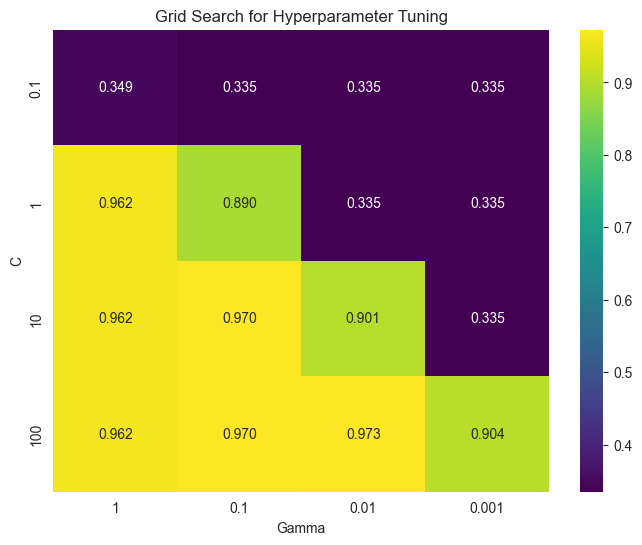

In [54]:
cv_results = grid_search.cv_results_
scores = cv_results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search for Hyperparameter Tuning')
plt.show()


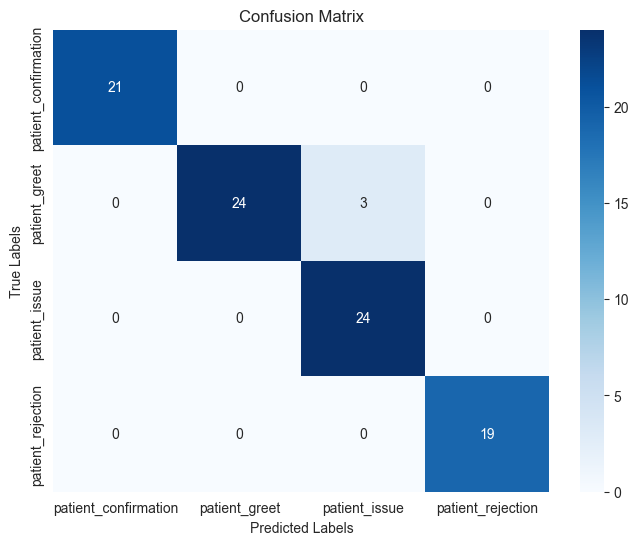

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()